In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_generator import generate_simple_dataset

In [2]:
x = generate_simple_dataset()

print(f"Shape of x: {x.shape}")

Shape of x: (100, 5)


In [3]:
x_centered = x - np.mean(x, axis=0, keepdims=True)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(x_centered)
x_original_pca = pca.transform(x_centered)

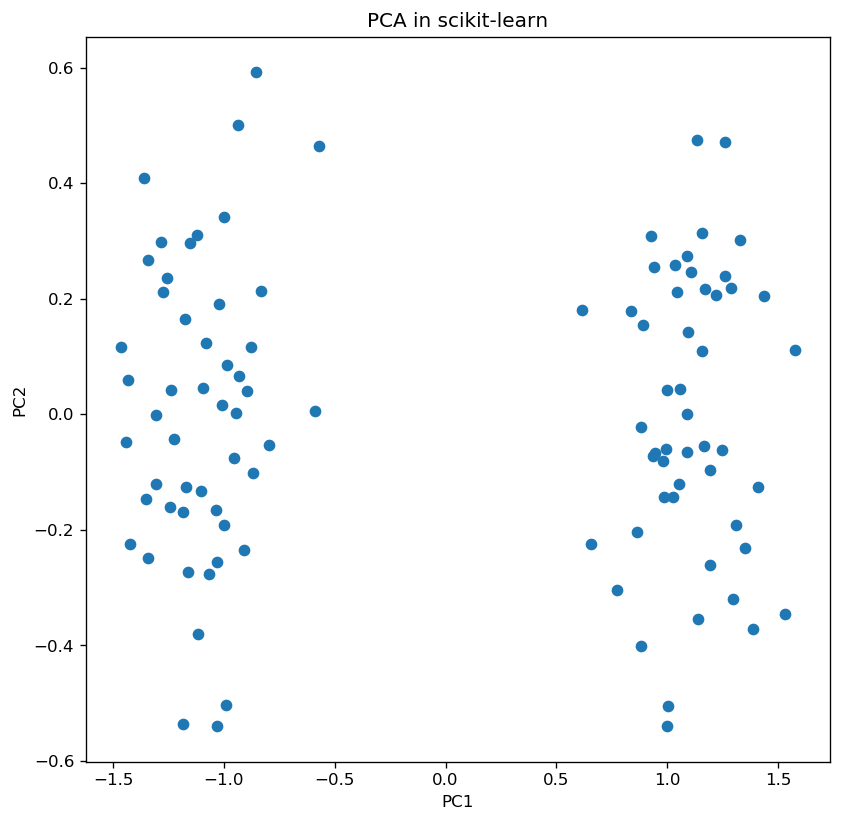

In [6]:
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(x_original_pca[:, 0], x_original_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA in scikit-learn")
plt.show()

In [7]:
class PrincipalComponentAnalysis():
    
    def __init__(self, n_components):
        self.n_components = n_components
        
        self.eigen_mat = None
        self.mean = None
        self.std = None
        
    def fit(self, x):
        n, d = x.shape
        
        cov = np.matmul(x.T, x)/n # np.cov(x_std.T)
        eigvals, eigvecs = np.linalg.eig(cov)
        
        eig_pairs = [(eigvals[i], eigvecs[:, i]) for i in range(d)]
        
        # sort in descending order
        sorted_eig = sorted(eig_pairs, key=lambda tup: tup[0], reverse=True)
        self.eigen_mat = np.stack(list(map(lambda tup: tup[1], sorted_eig)), axis=1)
        
    def transform(self, x):
        if self.eigen_mat is None:
            print("You should fit model first!")
            return
        
        reduced_eigen_mat = self.eigen_mat[:, :self.n_components]
        results = np.matmul(x, reduced_eigen_mat)
        
        return results

In [8]:
pca = PrincipalComponentAnalysis(n_components=2)

In [9]:
pca.fit(x_centered)

In [10]:
x_transformed = pca.transform(x_centered)

print(f"Shape of transformed x: {x_transformed.shape}")

Shape of transformed x: (100, 2)


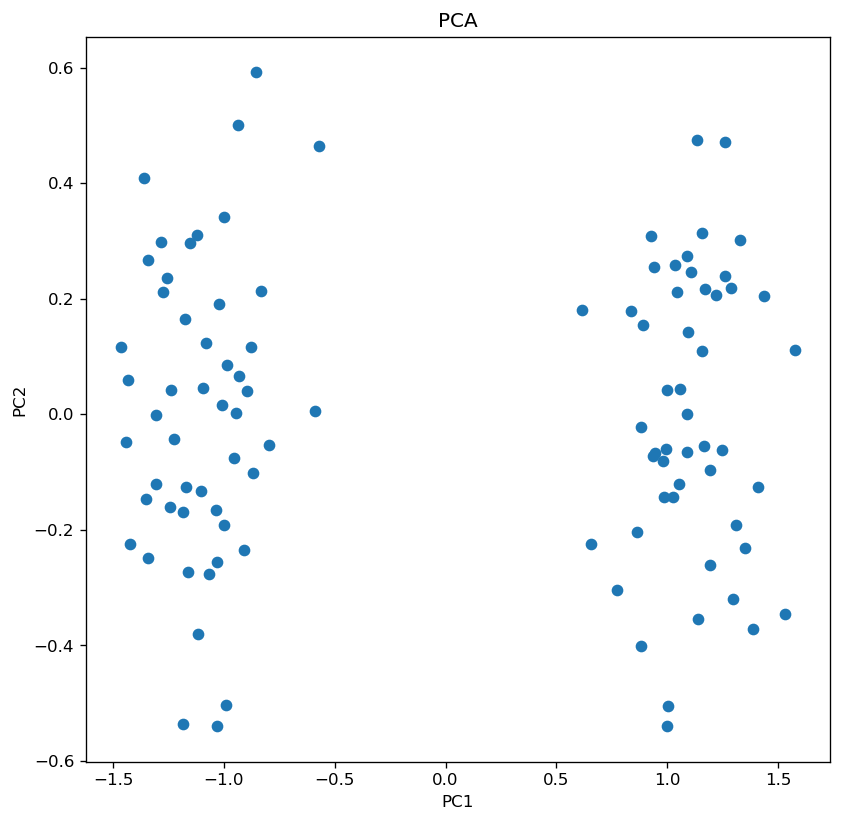

In [11]:
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(x_transformed[:, 0], x_transformed[:, 1])
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()